In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

sns.set_theme(style="darkgrid")

In [12]:
df = pd.read_csv('datasets/train.csv')
df.sample(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2474,2474,52,1.0,F,NO,0.0,0.0,0,1,0,215.0,180.0,108.0,37.02,60.0,89.0,0
3190,3190,45,2.0,M,YES,5.0,0.0,0,1,0,238.0,141.0,87.0,26.46,54.0,68.0,0
545,545,66,2.0,F,NO,0.0,0.0,0,1,0,292.0,143.0,95.0,31.11,90.0,77.0,1
1454,1454,41,1.0,M,YES,20.0,0.0,0,0,0,163.0,102.0,59.5,22.27,67.0,82.0,0
923,923,52,1.0,F,NO,0.0,NaN,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0


In [13]:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 3390 rows and 17 columns


In [14]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
df = df.drop(['id', 'TenYearCHD'], axis=1)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0


In [16]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
dtype: int64

In [17]:
df.dropna(inplace=True)
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')
df.isnull().sum()

Dataset has 2927 rows and 15 columns


age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2927.0,49.507345,8.597191,32.00,42.00,49.00,56.00,70.0
education,2927.0,1.965494,1.017199,1.00,1.00,2.00,3.00,4.0
cigsPerDay,2927.0,9.112743,11.882784,0.00,0.00,0.00,20.00,70.0
BPMeds,2927.0,0.030065,0.170795,0.00,0.00,0.00,0.00,1.0
prevalentStroke,2927.0,0.006150,0.078192,0.00,0.00,0.00,0.00,1.0
prevalentHyp,2927.0,0.314315,0.464322,0.00,0.00,0.00,1.00,1.0
diabetes,2927.0,0.026990,0.162082,0.00,0.00,0.00,0.00,1.0
totChol,2927.0,237.129142,44.613282,113.00,206.00,234.00,264.00,600.0
sysBP,2927.0,132.626409,22.326197,83.50,117.00,128.50,144.00,295.0
diaBP,2927.0,82.906218,12.078873,48.00,74.50,82.00,90.00,142.5


In [19]:
df.drop(columns=['BPMeds', 'prevalentHyp', 'sysBP'], inplace=True) # Removing columns which give information into the target variable
df.sample(5)

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1678,65,1.0,F,NO,0.0,0,0,245.0,89.0,23.07,82.0,93.0
366,62,4.0,M,NO,0.0,0,0,240.0,95.0,25.37,63.0,70.0
1746,35,2.0,M,YES,20.0,0,0,231.0,72.5,22.78,72.0,93.0
2386,48,2.0,F,YES,20.0,0,0,271.0,84.0,21.97,120.0,85.0
220,47,2.0,M,YES,18.0,0,0,439.0,74.0,22.42,100.0,90.0


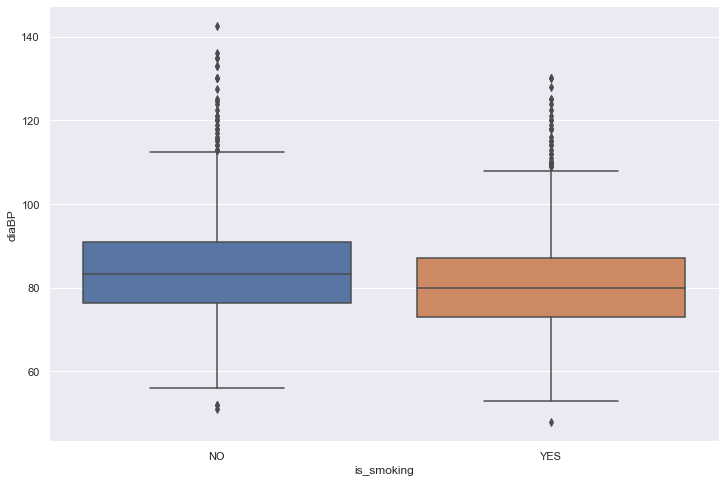

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_smoking', y='diaBP', data=df);

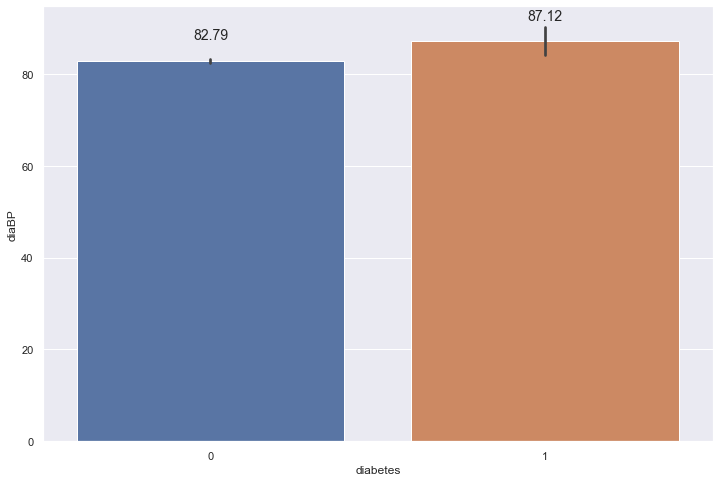

In [21]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df, x='diabetes', y='diaBP')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 4, round(rect.get_height(), 2),
            ha='center', va='bottom', fontsize=14)

plt.show();

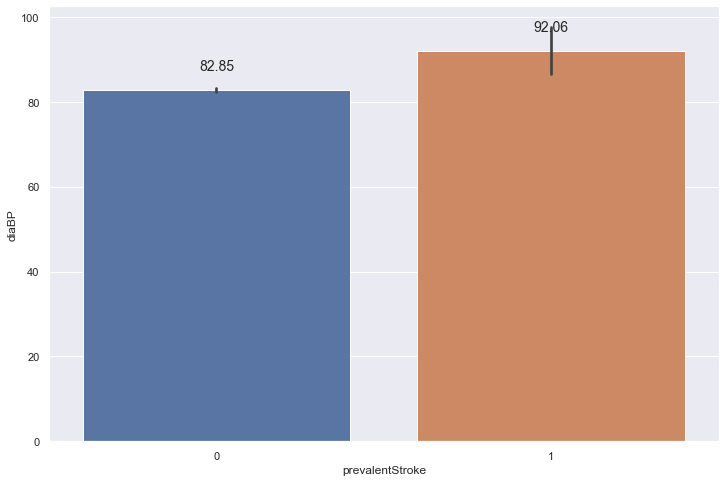

In [22]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df, x='prevalentStroke', y='diaBP')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 4, round(rect.get_height(), 2),
            ha='center', va='bottom', fontsize=14)

plt.show();

In [23]:
df_corr = df.corr(method='spearman')
df_corr

,age,education,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
age,1.000000,-0.188446,-0.204252,0.050761,0.110026,0.306954,0.229036,0.151229,0.011562,0.106081
education,-0.188446,1.000000,0.027388,-0.025668,-0.060679,-0.022693,-0.064203,-0.142068,-0.049372,-0.018194
cigsPerDay,-0.204252,0.027388,1.000000,-0.053543,-0.051918,-0.037292,-0.105820,-0.137484,0.064169,-0.094240
prevalentStroke,0.050761,-0.025668,-0.053543,1.000000,0.013866,0.004797,0.057746,0.014857,-0.012818,0.013458
diabetes,0.110026,-0.060679,-0.051918,0.013866,1.000000,0.053037,0.057915,0.077671,0.045870,0.215581
totChol,0.306954,-0.022693,-0.037292,0.004797,0.053037,1.000000,0.190048,0.151337,0.090829,0.039553
diaBP,0.229036,-0.064203,-0.105820,0.057746,0.057915,0.190048,1.000000,0.382744,0.176149,0.056180
BMI,0.151229,-0.142068,-0.137484,0.014857,0.077671,0.151337,0.382744,1.000000,0.068100,0.072622
heartRate,0.011562,-0.049372,0.064169,-0.012818,0.045870,0.090829,0.176149,0.068100,1.000000,0.096382
glucose,0.106081,-0.018194,-0.094240,0.013458,0.215581,0.039553,0.056180,0.072622,0.096382,1.000000


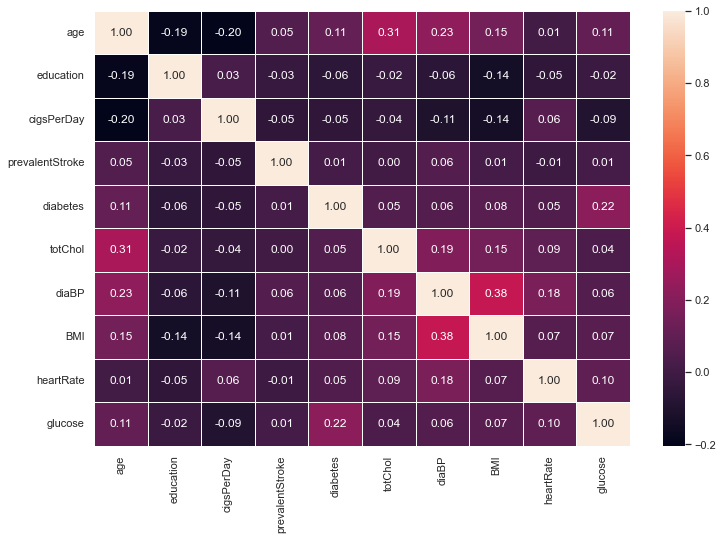

In [24]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, linewidths=.5, fmt='.2f', ax=ax);

In [25]:
label_enc = preprocessing.LabelEncoder()
df['sex'] = label_enc.fit_transform(df['sex'].astype(str))
df['is_smoking'] = label_enc.fit_transform(df['is_smoking'].astype(str))
df.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,36,4.0,1,0,0.0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1.0,0,1,10.0,0,0,250.0,71.0,20.35,88.0,94.0
3,50,1.0,1,1,20.0,0,0,233.0,88.0,28.26,68.0,94.0
4,64,1.0,0,1,30.0,0,0,241.0,85.0,26.42,70.0,77.0
5,61,3.0,0,0,0.0,0,0,272.0,121.0,32.80,85.0,65.0


In [26]:
df['cigsPerDay'] = df['cigsPerDay'].astype(int)
df['education'] = df['education'].astype(int)
df.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,36,4,1,0,0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1,0,1,10,0,0,250.0,71.0,20.35,88.0,94.0
3,50,1,1,1,20,0,0,233.0,88.0,28.26,68.0,94.0
4,64,1,0,1,30,0,0,241.0,85.0,26.42,70.0,77.0
5,61,3,0,0,0,0,0,272.0,121.0,32.80,85.0,65.0


In [27]:
df.to_csv('datasets/bp_data_preprocessed.csv', index=False)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [29]:
X = df.drop(columns=['diaBP'])
y = df['diaBP']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2341, 11), (586, 11), (2341,), (586,))

In [31]:
X_train_num = X_train[['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']]
X_test_num = X_test[['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']]

In [32]:
X_train_categorical = X_train[['education', 'sex', 'is_smoking', 'prevalentStroke', 'diabetes']]
X_test_categorical = X_test[['education', 'sex', 'is_smoking', 'prevalentStroke', 'diabetes']]

In [33]:
scaler = StandardScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(X_train_num),
                            columns=X_train_num.columns)
X_test_num = pd.DataFrame(scaler.transform(X_test_num),
                            columns=X_test_num.columns)

In [34]:
X_train_categorical.reset_index(drop=True, inplace=True)
X_train_num.reset_index(drop=True, inplace=True)

X_train = pd.concat([X_train_num, X_train_categorical], axis=1)
X_train.head()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,education,sex,is_smoking,prevalentStroke,diabetes
0,0.515104,-0.762578,-0.248980,0.513785,1.340284,-0.445213,4,1,0,0,0
1,0.630167,-0.004319,1.153096,-0.193332,0.017656,-0.246758,2,0,1,0,0
2,-1.210838,-0.762578,-0.805360,-0.368909,-0.726322,0.308914,3,0,0,0,0
3,1.780795,-0.762578,0.307399,0.160226,-1.304972,-0.326140,1,1,0,0,0
4,-0.865650,0.922443,-0.627318,-0.479546,-0.560994,-0.723049,1,0,1,0,0


In [35]:
X_test_categorical.reset_index(drop=True, inplace=True)
X_test_num.reset_index(drop=True, inplace=True)

X_test = pd.concat([X_test_num, X_test_categorical], axis=1)
X_test.head()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,education,sex,is_smoking,prevalentStroke,diabetes
0,0.745230,1.764954,-0.894381,-1.145776,1.174955,-0.048304,2,1,1,0,0
1,1.205481,-0.762578,0.841523,0.925067,0.761634,0.150151,1,0,0,0,0
2,-0.750587,0.922443,-0.738594,0.051994,2.001597,-0.127686,1,0,1,0,0
3,0.054853,1.343699,0.062592,-0.337642,-0.808987,-0.802431,3,1,1,0,0
4,1.435607,-0.762578,1.664965,-0.828295,0.100320,-0.008613,1,0,0,0,0


In [40]:
def build_model(regressor, X_train, y_train, X_test, y_test):
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    result_dict = {'training_score': training_score, 'testing_score': testing_score}
    return result_dict

In [41]:
def performance_metrics_report(report_log):

    for key in report_log:
        print('-' * 50)
        print(f'Regression Model: {key}')
        print('-' * 50)

        print()
        for score in report_log[key]:
            print(f'{score}: {report_log[key][score]}')

In [42]:
report_log = dict()

In [44]:
report_log['Linear Regression'] = build_model(LinearRegression(), X_train, y_train, X_test, y_test)
report_log['KNN Regression'] = build_model(KNeighborsRegressor(), X_train, y_train, X_test, y_test)
report_log['SVM Regression'] = build_model(SVR(), X_train, y_train, X_test, y_test)
report_log['Random Forest Regression'] = build_model(RandomForestRegressor(), X_train, y_train, X_test, y_test)

performance_metrics_report(report_log)

--------------------------------------------------
Regression Model: Linear Regression
--------------------------------------------------

training_score: 0.2247643237059106
testing_score: 0.19261532132944836
--------------------------------------------------
Regression Model: KNN Regression
--------------------------------------------------

training_score: 0.3976177307921662
testing_score: 0.003757990471336514
--------------------------------------------------
Regression Model: SVM Regression
--------------------------------------------------

training_score: 0.21908307778079694
testing_score: 0.18639415526737724
--------------------------------------------------
Regression Model: Random Forest Regression
--------------------------------------------------

training_score: 0.8822842012171869
testing_score: 0.12251376948673531
